In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Binary Logistic Regression

## 2 Classes

In [2]:
from sklearn.datasets import make_blobs

## Data Generation

In [3]:
X, y = make_blobs(centers=2, random_state=1)  # 2 Cluster

X.shape, y.shape  # m,n m(row)-training example n(column)-feature

((100, 2), (100,))

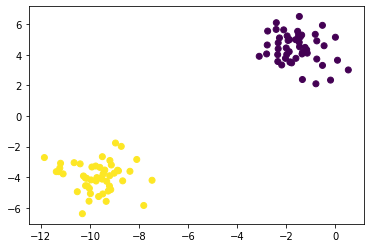

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
class LogisticrRegression:
    def __init__(self, lr=0.0009, itera=1000):
        self.lr = lr
        self.itera = itera

    def fit(self, X, y):
        X0 = np.ones((X.shape[0], 1))
        X = np.hstack((X0, X.copy()))  # adding X - 0 = 1
        y = y.copy()   #.reshape(-1, 1)
        
        self.errors = []
        
        self.theta_ = np.random.random((X.shape[1]))
        
        for i in range(1, self.itera):
            error = self.gradient_assent(X, y)
            self.errors.append(error)
            
    def gradient_assent(self, X, y):
        self.theta_ += self.gradient(X, y)
        
        return -np.mean((y*(np.log(self.hypothesis(X)))) + ((1 - y)*(np.log(1-self.hypothesis(X))))) 

    def gradient(self, X, y):
        h = self.hypothesis(X)
        delJ = np.dot(X.T, (h - y))/X.shape[0]
        
        return -self.lr*delJ
        
    def hypothesis(self, X):
        z = np.dot(X, self.theta_)
        
        return 1/(1 + np.exp(-z))
    
    def predict(self, X):
        X0 = np.ones((X.shape[0], 1))
        X = np.hstack((X0, X))
        h = self.hypothesis(X)
        h[h >= 0.5] = 1
        h[h < 0.5] = 0
        return h

In [6]:
model = LogisticrRegression(lr=0.1, itera=200)

model.fit(X, y)

model.theta_

array([ 0.41561914, -0.14383489, -1.45592684])

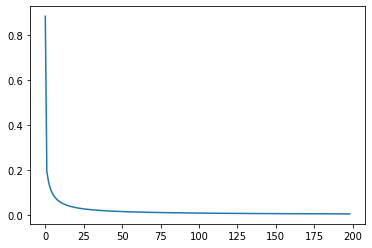

In [7]:
plt.plot(model.errors)

In [8]:
def R2_Score(y, y_):   # y_actual, y_predicted 
    num = np.sum((y-y_)**2)
    den = np.sum((y-np.mean(y))**2)
    return (1 - (num/den))*100

In [9]:
R2_Score(y, model.predict(X))

100.0

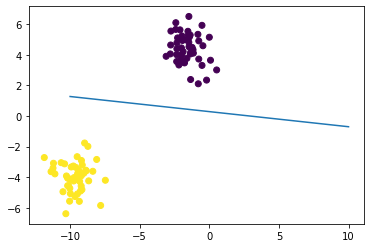

In [10]:
plt.scatter(X[:,0], X[:,1], c=y)

x1 = np.linspace(-10, 10, 2)
x2 = ((-model.theta_[1]/model.theta_[2])*x1) - (model.theta_[0]/model.theta_[2])
plt.plot(x1, x2)

## Sklearn

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()

In [21]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
colors = ['red', 'yellow', 'blue']

col = [colors[item] for item in y]

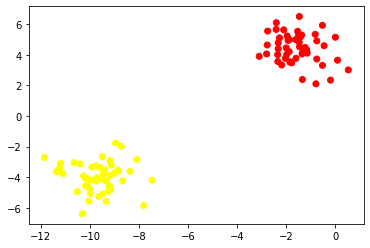

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=col)

In [16]:
model.classes_

array([0, 1])

In [17]:
model.intercept_

array([-4.19693856])

In [18]:
model.score(X, y)

1.0

In [19]:
model.predict_proba(X).argmax(axis=1)

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [20]:
y

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

## More than 2 Classes

In [137]:
X, y = make_blobs(centers=4, random_state=42) # 4 Cluster
X = X
X.shape, y.shape  # m,n m(row)-training example n(column)-feature

((100, 2), (100,))

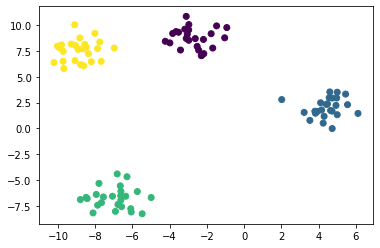

In [138]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [156]:
class LogisticRegression:
    def __init__(self, lr=0.0009, itera=1000):
        self.lr = lr
        self.itera = itera

    def fit(self, X, y):
        X0 = np.ones((X.shape[0], 1))
        X = np.hstack((X0, X.copy()))  # adding X - 0 = 1
        y = y.copy()   #.reshape(-1, 1)
        
        self.errors = []
        
        self.classes_ = np.unique(y)
        
        self.thetas_ = np.random.random((self.classes, X.shape[1]))
        
        for j in range(1, self.itera):
            error = self.gradient_assent(X, y)
            self.errors.append(error)
            
    def gradient_assent(self, X, y):
        errors = []
        for k in self.classes_:
            y_select = y.copy()
            y_select = (y==k).astype('int')
            self.thetas_[k] += self.gradient(X, y_select, k)
            errors.append(-np.mean((y_select*(np.log(self.hypothesis(X, k)))) + ((1 - y_select)*(np.log(1-self.hypothesis(X, k))))))
        
        return errors

    def gradient(self, X, y, k):
        h = self.hypothesis(X, k)
        delJ = np.dot(X.T, (h - y))/X.shape[0]
        
        return -self.lr*delJ
        
    def hypothesis(self, X, k):
        z = np.dot(X, self.thetas_[k])
        
        return 1/(1 + np.exp(-z))
    
    def predict(self, X):
        X0 = np.ones((X.shape[0], 1))
        X = np.hstack((X0, X))
        h = self.hypothesis(X, k)
        h[h >= 0.5] = 1
        h[h < 0.5] = 0
        return h

In [157]:
model = LogisticRegression

In [163]:
model = LogisticrRegression(lr=0.001, itera=2000)

model.fit(X, y)

model.thetas_

[array([ 0.24817867,  0.27598978, -0.18341219]),
 array([ 0.05583423,  0.7530517 , -0.15822596]),
 array([-0.05640098,  0.24801832, -0.17210788]),
 array([-0.30935818,  0.22954489, -0.16437077])]

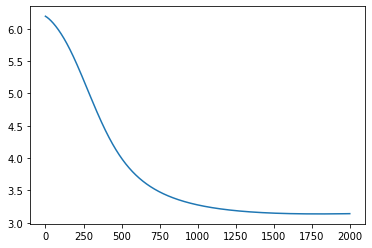

In [164]:
errors = np.array(model.errors)
errors.shape

plt.plot(errors)

# plt.ylim([0, 1])

(-10, 10)

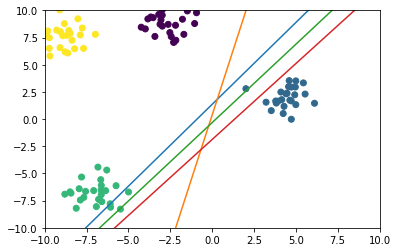

In [165]:
plt.scatter(X[:, 0], X[:, 1], c=y)

for theta in model.thetas_:
    x1 = np.linspace(-10, 10, 2)
    x2 = ((-theta[1]/theta[2])*x1) - (theta[0]/theta[2])
    plt.plot(x1, x2)
    
plt.xlim([-10, 10])
plt.ylim([-10, 10])